In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = "ex1.npy"
image = np.load(filename)

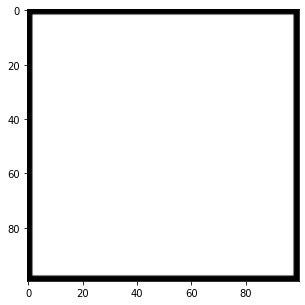

In [5]:
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap="gray")
plt.show()

In [23]:
extern_masks = np.array([
    [
        [0, 0],
        [0, 1]
    ],
    [
        [1, 0],
        [0, 0]
    ],
    [
        [0, 1],
        [0, 0]
    ],
    [
        [0, 0],
        [1, 0]
    ]
])

intern_masks = np.logical_not(extern_masks).astype("int")
# or intern_masks = extern_masks ^ 1

cross_masks = np.array([
    [
        [1, 0],
        [0, 1],
    ],
    [
        [0, 1],
        [1, 0]
    ]
])

In [9]:
def match(a, masks):
    for mask in masks:
        if np.all(a == mask):
            return True
    return False

In [29]:
def count_objects(image):
    extern, intern, cross = 0, 0, 0
    
    for y in range(0, image.shape[0] - 1):
        for x in range(0, image.shape[1] - 1):
            sub = image[y:y+2, x:x+2]
            
            if match(sub, extern_masks):
                extern += 1
                continue
            
            if match(sub, intern_masks):
                intern += 1
                continue
                
            if match(sub, cross_masks):
                cross += 1
            
    return (extern - intern) / 4 + cross / 2

In [27]:
count_objects(image)

1.75

In [30]:
for i in range(1, 7):
    filename = f"ex{i}.npy"
    image = np.load(filename)
    print("Objects number for", filename, ": ", count_objects(image))

Objects number for ex1.npy :  1.0
Objects number for ex2.npy :  1.0
Objects number for ex3.npy :  1.0
Objects number for ex4.npy :  3.0
Objects number for ex5.npy :  64.0
Objects number for ex6.npy :  2.0


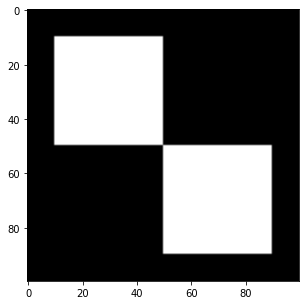

In [20]:
image = np.load("ex6.npy")
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap="gray")
plt.show()